In [1]:
#venv: tf
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from math import sqrt

import sqlite3
import warnings
warnings.filterwarnings('ignore')

import datetime
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns; sns.set_theme(color_codes=True)
sns.set_context("paper")


In [2]:
print(tf.__version__)

2.0.0


In [7]:
conn = sqlite3.connect(r'/Users/rosaicelaroman/Desktop/portfolio_work/earthquake_modeling/Database/db/earthquake_db')
print("Connected to database...")

Connected to database...


In [8]:
model_df = pd.read_sql_query("SELECT * FROM earthquake_raw", conn)
model_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-01-06T01:42:39.855Z,37.3840,-117.107500,1.10,1.30,ml,8.0,149.46,0.87500,0.2175,...,2022-01-06T01:47:19.317Z,"37 km SSE of Goldfield, Nevada",earthquake,NaN,39.10,0.290,4.0,automatic,nn,nn
1,2022-01-06T01:31:33.698Z,38.1810,-117.818000,7.30,1.40,ml,11.0,154.64,0.11900,0.1017,...,2022-01-06T01:47:40.245Z,"34 km SE of Mina, Nevada",earthquake,NaN,2.00,0.460,5.0,automatic,nn,nn
2,2022-01-06T01:24:20.083Z,61.3407,-149.885200,30.00,1.50,ml,NaN,NaN,NaN,0.7500,...,2022-01-06T01:29:22.015Z,"5 km ESE of Point MacKenzie, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
3,2022-01-06T01:15:15.851Z,62.8703,-150.762500,111.30,2.10,ml,NaN,NaN,NaN,0.3200,...,2022-01-06T01:29:21.875Z,"41 km N of Petersville, Alaska",earthquake,NaN,0.80,NaN,NaN,automatic,ak,ak
4,2022-01-06T01:10:44.629Z,64.0145,-148.765700,1.90,1.50,ml,NaN,NaN,NaN,0.7200,...,2022-01-06T01:15:56.292Z,"17 km E of Ferry, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33889,2022-02-15T19:12:23.740Z,39.4215,-110.312333,-1.56,1.83,md,9.0,194.00,0.01022,0.1200,...,2022-02-15T19:51:17.520Z,"15 km SSE of Sunnyside, Utah",earthquake,0.63,0.36,0.324,7.0,reviewed,uu,uu
33890,2022-02-15T19:04:27.070Z,38.8250,-122.797167,2.68,0.41,md,25.0,44.00,0.01021,0.0300,...,2022-02-17T09:24:12.854Z,"6km NNW of The Geysers, CA",earthquake,0.18,0.28,0.129,3.0,reviewed,nc,nc
33891,2022-02-15T19:00:38.627Z,38.5375,-119.382100,0.00,1.40,ml,6.0,179.74,0.05500,0.1995,...,2022-02-16T02:37:07.010Z,"8 km ENE of Walker, California",earthquake,NaN,0.00,0.280,3.0,reviewed,nn,nn
33892,2022-02-15T18:52:46.384Z,55.3724,-159.286100,15.00,1.80,ml,NaN,NaN,NaN,0.5500,...,2022-03-05T17:45:05.111Z,"60 km SSE of Ivanof Bay, Alaska",earthquake,NaN,0.40,NaN,NaN,reviewed,ak,ak


In [9]:
model_df['time'] = pd.to_datetime(model_df['time'])
model_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-01-06 01:42:39.855000+00:00,37.3840,-117.107500,1.10,1.30,ml,8.0,149.46,0.87500,0.2175,...,2022-01-06T01:47:19.317Z,"37 km SSE of Goldfield, Nevada",earthquake,NaN,39.10,0.290,4.0,automatic,nn,nn
1,2022-01-06 01:31:33.698000+00:00,38.1810,-117.818000,7.30,1.40,ml,11.0,154.64,0.11900,0.1017,...,2022-01-06T01:47:40.245Z,"34 km SE of Mina, Nevada",earthquake,NaN,2.00,0.460,5.0,automatic,nn,nn
2,2022-01-06 01:24:20.083000+00:00,61.3407,-149.885200,30.00,1.50,ml,NaN,NaN,NaN,0.7500,...,2022-01-06T01:29:22.015Z,"5 km ESE of Point MacKenzie, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
3,2022-01-06 01:15:15.851000+00:00,62.8703,-150.762500,111.30,2.10,ml,NaN,NaN,NaN,0.3200,...,2022-01-06T01:29:21.875Z,"41 km N of Petersville, Alaska",earthquake,NaN,0.80,NaN,NaN,automatic,ak,ak
4,2022-01-06 01:10:44.629000+00:00,64.0145,-148.765700,1.90,1.50,ml,NaN,NaN,NaN,0.7200,...,2022-01-06T01:15:56.292Z,"17 km E of Ferry, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33889,2022-02-15 19:12:23.740000+00:00,39.4215,-110.312333,-1.56,1.83,md,9.0,194.00,0.01022,0.1200,...,2022-02-15T19:51:17.520Z,"15 km SSE of Sunnyside, Utah",earthquake,0.63,0.36,0.324,7.0,reviewed,uu,uu
33890,2022-02-15 19:04:27.070000+00:00,38.8250,-122.797167,2.68,0.41,md,25.0,44.00,0.01021,0.0300,...,2022-02-17T09:24:12.854Z,"6km NNW of The Geysers, CA",earthquake,0.18,0.28,0.129,3.0,reviewed,nc,nc
33891,2022-02-15 19:00:38.627000+00:00,38.5375,-119.382100,0.00,1.40,ml,6.0,179.74,0.05500,0.1995,...,2022-02-16T02:37:07.010Z,"8 km ENE of Walker, California",earthquake,NaN,0.00,0.280,3.0,reviewed,nn,nn
33892,2022-02-15 18:52:46.384000+00:00,55.3724,-159.286100,15.00,1.80,ml,NaN,NaN,NaN,0.5500,...,2022-03-05T17:45:05.111Z,"60 km SSE of Ivanof Bay, Alaska",earthquake,NaN,0.40,NaN,NaN,reviewed,ak,ak


In [10]:
#adding column of converted time to datetime
model_df['Unix Time'] = pd.to_datetime(model_df['time']).astype(int)/10**9
model_df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Unix Time
0,2022-01-06 01:42:39.855000+00:00,37.3840,-117.1075,1.1,1.3,ml,8.0,149.46,0.875,0.2175,...,"37 km SSE of Goldfield, Nevada",earthquake,NaN,39.1,0.29,4.0,automatic,nn,nn,1.641433e+09
1,2022-01-06 01:31:33.698000+00:00,38.1810,-117.8180,7.3,1.4,ml,11.0,154.64,0.119,0.1017,...,"34 km SE of Mina, Nevada",earthquake,NaN,2.0,0.46,5.0,automatic,nn,nn,1.641433e+09
2,2022-01-06 01:24:20.083000+00:00,61.3407,-149.8852,30.0,1.5,ml,NaN,NaN,NaN,0.7500,...,"5 km ESE of Point MacKenzie, Alaska",earthquake,NaN,0.2,NaN,NaN,automatic,ak,ak,1.641432e+09
3,2022-01-06 01:15:15.851000+00:00,62.8703,-150.7625,111.3,2.1,ml,NaN,NaN,NaN,0.3200,...,"41 km N of Petersville, Alaska",earthquake,NaN,0.8,NaN,NaN,automatic,ak,ak,1.641432e+09
4,2022-01-06 01:10:44.629000+00:00,64.0145,-148.7657,1.9,1.5,ml,NaN,NaN,NaN,0.7200,...,"17 km E of Ferry, Alaska",earthquake,NaN,0.6,NaN,NaN,automatic,ak,ak,1.641431e+09


In [11]:
#drop columns not needed
cleaned_df = model_df.drop(columns=['id', 'nst','rms','magNst','net', 'time', 'magType', 'gap','dmin', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'status', 'locationSource', 'magSource'])
cleaned_df

,latitude,longitude,depth,mag,Unix Time
0,37.3840,-117.107500,1.10,1.30,1.641433e+09
1,38.1810,-117.818000,7.30,1.40,1.641433e+09
2,61.3407,-149.885200,30.00,1.50,1.641432e+09
3,62.8703,-150.762500,111.30,2.10,1.641432e+09
4,64.0145,-148.765700,1.90,1.50,1.641431e+09
...,...,...,...,...,...
33889,39.4215,-110.312333,-1.56,1.83,1.644952e+09
33890,38.8250,-122.797167,2.68,0.41,1.644952e+09
33891,38.5375,-119.382100,0.00,1.40,1.644952e+09
33892,55.3724,-159.286100,15.00,1.80,1.644951e+09


In [12]:
cleaned_df.isnull().sum()

latitude     0
longitude    0
depth        0
mag          6
Unix Time    0
dtype: int64

In [13]:
cleaned_df_dropped = cleaned_df.dropna()

In [14]:
cleaned_df_dropped = cleaned_df_dropped.rename(columns={'mag':'label'})
cleaned_df_dropped

,latitude,longitude,depth,label,Unix Time
0,37.3840,-117.107500,1.10,1.30,1.641433e+09
1,38.1810,-117.818000,7.30,1.40,1.641433e+09
2,61.3407,-149.885200,30.00,1.50,1.641432e+09
3,62.8703,-150.762500,111.30,2.10,1.641432e+09
4,64.0145,-148.765700,1.90,1.50,1.641431e+09
...,...,...,...,...,...
33889,39.4215,-110.312333,-1.56,1.83,1.644952e+09
33890,38.8250,-122.797167,2.68,0.41,1.644952e+09
33891,38.5375,-119.382100,0.00,1.40,1.644952e+09
33892,55.3724,-159.286100,15.00,1.80,1.644951e+09


In [15]:
#https://www.tensorflow.org/tutorials/keras/regression
train_dataset = cleaned_df_dropped.sample(frac=0.8, random_state=0)
test_dataset = cleaned_df_dropped.drop(train_dataset.index)

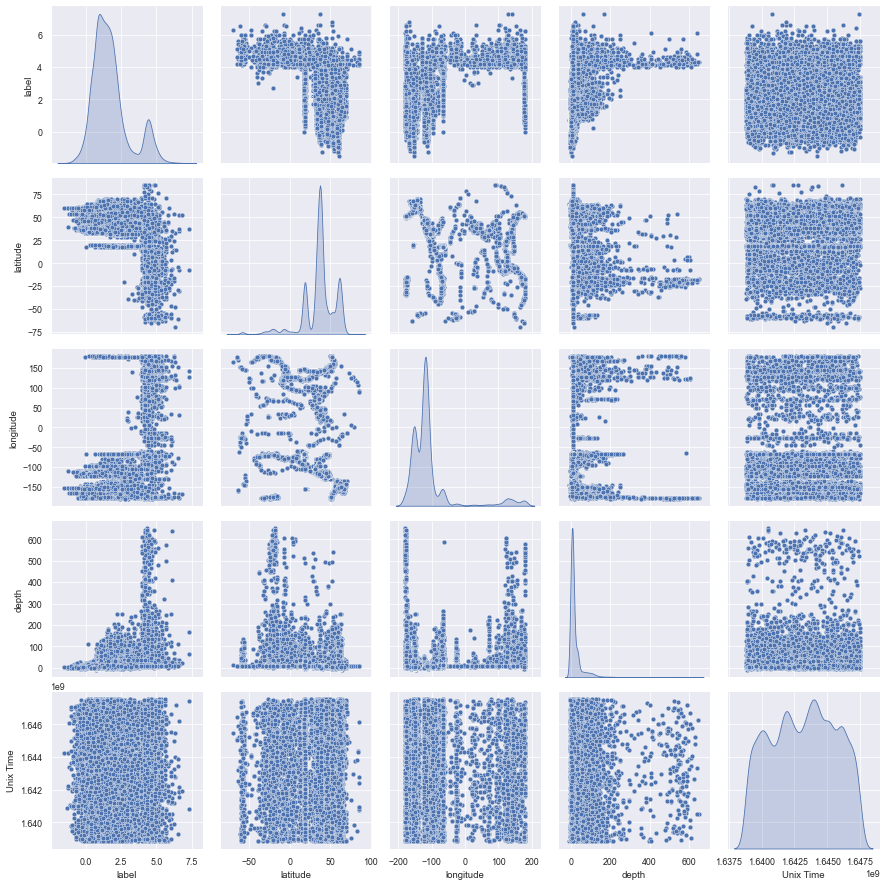

In [16]:
sns.pairplot(train_dataset[['label', 'latitude', 'longitude', 'depth', 'Unix Time']], diag_kind='kde')

In [17]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,27110.0,3.624691e+01,2.020801e+01,-6.978250e+01,3.333479e+01,3.818500e+01,4.619767e+01,8.537330e+01
longitude,27110.0,-1.074725e+02,7.245246e+01,-1.799985e+02,-1.498565e+02,-1.212682e+02,-1.156051e+02,1.799901e+02
depth,27110.0,2.307089e+01,5.378177e+01,-1.000000e+01,3.390000e+00,8.990000e+00,1.842000e+01,6.538700e+02
label,27110.0,1.723471e+00,1.276460e+00,-1.490000e+00,8.500000e-01,1.480000e+00,2.160000e+00,7.300000e+00
Unix Time,27110.0,1.643192e+09,2.427954e+06,1.638842e+09,1.641200e+09,1.643297e+09,1.645199e+09,1.647541e+09


In [18]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('label')
test_labels = test_features.pop('label')

In [19]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
latitude,3.624691e+01,2.020801e+01
longitude,-1.074725e+02,7.245246e+01
depth,2.307089e+01,5.378177e+01
label,1.723471e+00,1.276460e+00
Unix Time,1.643192e+09,2.427954e+06


In [20]:
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [29]:
print(tf.__version__)

2.0.0


In [28]:
normalizer = tf.keras.layers.Normalization(axis=-1)


AttributeError: module 'tensorflow_core.keras.layers' has no attribute 'Normalization'

In [39]:
normalizer.adapt(np.array(train_features))

TypeError: Parameter to MergeFrom() must be instance of same class: expected tensorflow.TensorShapeProto got tensorflow.TensorShapeProto.

In [25]:
#following example: https://towardsdatascience.com/regression-based-neural-networks-with-tensorflow-v2-0-predicting-average-daily-rates-e20fffa7ac9a
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(4200, activation='relu'))
model.add(Dense(1, activation='linear'))


model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 4200)              25200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4201      
Total params: 29,431
Trainable params: 29,431
Non-trainable params: 0
_________________________________________________________________


In [26]:
#from https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

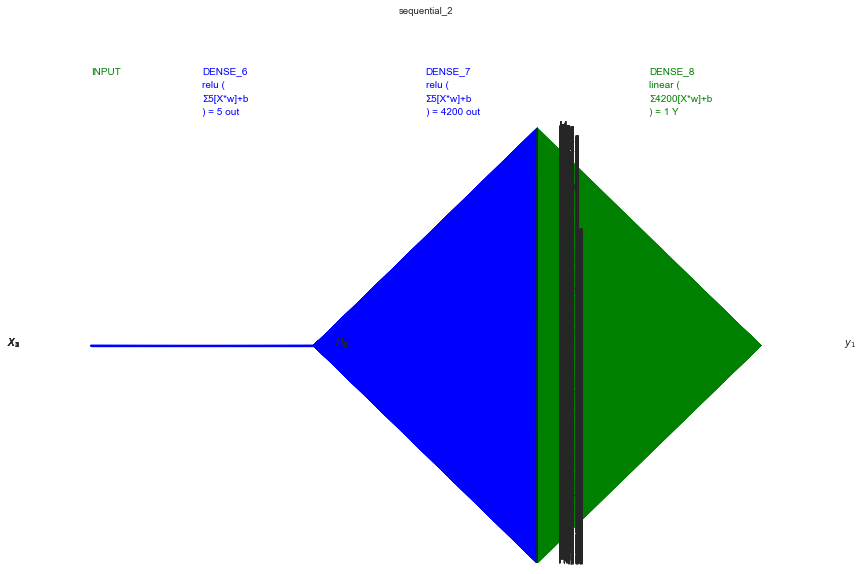

In [27]:
visualize_nn(model, description=True, figsize=(15,10))

In [29]:
model.compile(
    optimizer='Adagrad',
    loss="mean_squared_error",
    metrics = ['mae']
)

In [30]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    batch_size=32,
    epochs=400,
    validation_split=0.2,
    verbose=2
)

Epoch 1/400


ValueError: in user code:

    /Users/rosaicelaroman/opt/anaconda3/envs/MLenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/rosaicelaroman/opt/anaconda3/envs/MLenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/rosaicelaroman/opt/anaconda3/envs/MLenv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/rosaicelaroman/opt/anaconda3/envs/MLenv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/rosaicelaroman/opt/anaconda3/envs/MLenv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/rosaicelaroman/opt/anaconda3/envs/MLenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/rosaicelaroman/opt/anaconda3/envs/MLenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/rosaicelaroman/opt/anaconda3/envs/MLenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/rosaicelaroman/opt/anaconda3/envs/MLenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 5 but received input with shape (None, 4)


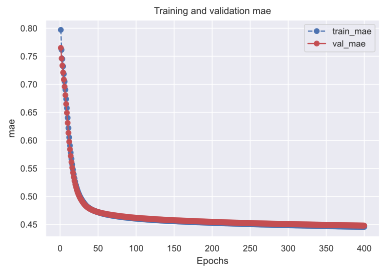

In [110]:
#following example: https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()


# val_metrics = history.history['val_'+metric]
# print(val_metrics)
plot_metric(history, 'mae')

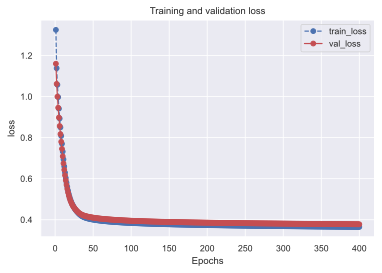

In [111]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()


# val_metrics = history.history['val_'+metric]
# print(val_metrics)
plot_metric(history, 'loss')

In [112]:
# def get_uncompiled_model():
#     inputs = keras.Input(shape=(784,), name="digits")
#     x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
#     x = layers.Dense(64, activation="relu", name="dense_2")(x)
#     outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
#     model = keras.Model(inputs=inputs, outputs=outputs)
#     return model


# def get_compiled_model():
#     model = get_uncompiled_model()
#     model.compile(
#         optimizer="rmsprop",
#         loss="sparse_categorical_crossentropy",
#         metrics=["sparse_categorical_accuracy"],
#     )
#     return model

In [113]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test mae:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:])
print("predictions shape:", predictions.shape)

Evaluate on test data
293/293 [==============================] - 0s 458us/step - loss: 0.3702 - mae: 0.4465
test loss, test mae: [0.3702256381511688, 0.44647738337516785]
Generate predictions for 3 samples
predictions shape: (9349, 1)


In [114]:
predictions_t=sc_y.inverse_transform(predictions)
print(predictions_t)

[[1.3102442 ]
 [1.2588776 ]
 [4.593729  ]
 ...
 [1.2667285 ]
 [0.95318335]
 [1.6299881 ]]


In [115]:
actual_mag=sc_y.inverse_transform(y_test)
df_pred = pd.DataFrame(actual_mag, columns=['Actual'])
df_pred['Predicted'] = predictions_t
df_pred

,Actual,Predicted
0,0.19,1.310244
1,1.95,1.258878
2,5.50,4.593729
3,4.70,4.412284
4,1.70,1.775796
...,...,...
9344,0.90,1.248735
9345,-0.65,0.840853
9346,0.29,1.266729
9347,1.22,0.953183


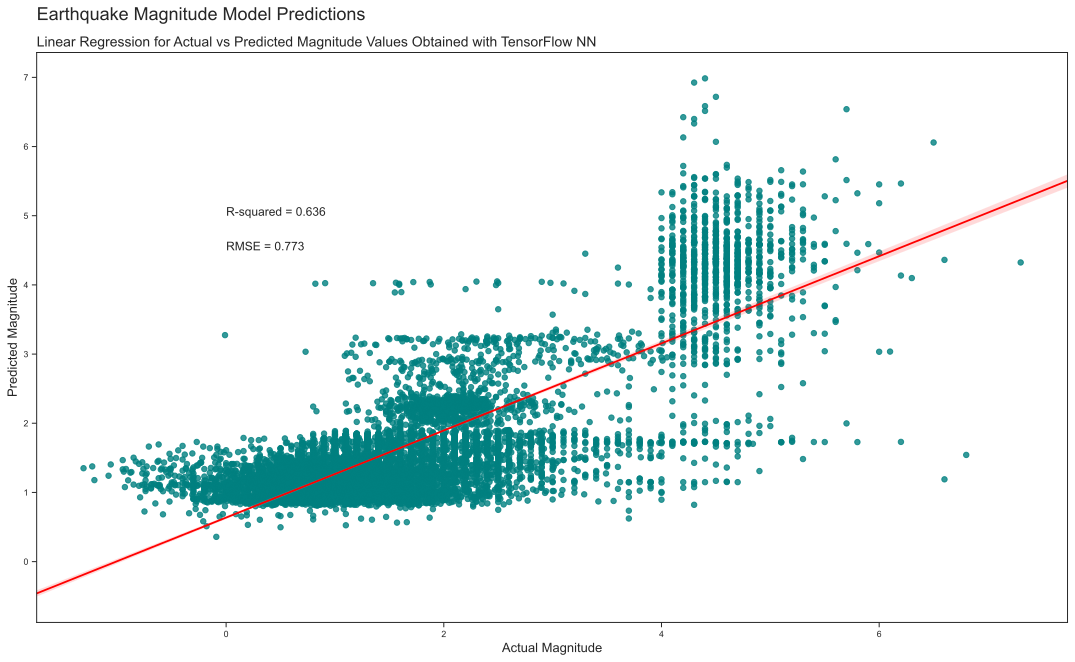

In [127]:
x = np.array(df_pred['Actual'])
y = np.array(df_pred['Predicted'])
test_mse = mean_squared_error(actual_mag,predictions_t)
rmse = sqrt(test_mse)

sns.set_style('ticks')
x,y = pd.Series(x, name="Actual"), pd.Series(y, name="Prediction")
# sns.lmplot(x ='Actual', y ='Prediction', data = mag_pred_all, markers =['o'],  palette ='coolwarm')
ax = sns.regplot(x=x, y=y, ci=95, truncate=False, scatter_kws={"s": 30, "color":'teal'}, line_kws={"color": "red"})
ax.set_axisbelow(True)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.ylabel('Predicted Magnitude', fontsize=13)
plt.xlabel('Actual Magnitude',  fontsize=13)
# Bigger title
plt.suptitle('Earthquake Magnitude Model Predictions', x=0.125, y=0.94, ha='left', fontsize=18)
# Subtitle
plt.title('Linear Regression for Actual vs Predicted Magnitude Values Obtained with TensorFlow NN', loc='left', fontsize=14)
plt.annotate("R-squared = {:.3f}".format(r2_score(x, y)), (0, 5),  fontsize=12)
plt.annotate("RMSE = {:.3f}".format(rmse), (0, 4.5), fontsize=12)

# fig.savefig('extratrees_mag_linear_sns.png', dpi=600)
plt.show()

In [117]:
page_url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.csv"

test_df = pd.read_csv(page_url)
test_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-03-12T01:44:13.050Z,41.029499,-121.745499,1.11,2.17,md,25.0,50.00,0.072710,0.0800,...,2022-03-12T01:45:46.928Z,"14km E of Big Bend, CA",earthquake,0.20,1.27,0.120,14.0,automatic,nc,nc
1,2022-03-12T01:32:46.004Z,38.139600,-118.277400,0.50,1.00,ml,11.0,166.15,0.211000,0.2769,...,2022-03-12T01:36:38.958Z,"31 km SSW of Mina, Nevada",earthquake,NaN,13.40,0.400,6.0,automatic,nn,nn
2,2022-03-12T01:28:20.163Z,58.248400,-151.235100,61.20,2.30,ml,NaN,NaN,NaN,0.8700,...,2022-03-12T01:30:43.562Z,"83 km ENE of Ouzinkie, Alaska",earthquake,NaN,2.50,NaN,NaN,automatic,ak,ak
3,2022-03-12T01:16:01.800Z,33.967500,-116.831500,6.63,1.15,ml,17.0,162.00,0.132200,0.2500,...,2022-03-12T01:19:38.493Z,"6km NE of Banning, CA",earthquake,1.05,3.44,0.324,14.0,automatic,ci,ci
4,2022-03-12T00:59:16.700Z,38.815166,-122.820503,2.73,0.50,md,12.0,66.00,0.009246,0.0200,...,2022-03-12T01:37:14.770Z,"7km NW of The Geysers, CA",earthquake,0.39,0.79,0.360,2.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2022-03-11T02:16:59.550Z,38.829500,-122.797167,1.20,1.67,md,50.0,31.00,0.010370,0.0400,...,2022-03-11T11:18:14.444Z,"6km W of Cobb, CA",earthquake,0.11,0.17,0.136,18.0,reviewed,nc,nc
248,2022-03-11T02:13:42.330Z,38.827000,-122.814331,0.97,0.85,md,6.0,133.00,0.004900,0.0200,...,2022-03-11T02:21:11.210Z,"8km NW of The Geysers, CA",earthquake,0.40,0.97,NaN,1.0,automatic,nc,nc
249,2022-03-11T02:07:08.640Z,36.486833,-81.118333,1.50,1.94,md,9.0,123.00,0.459300,0.3400,...,2022-03-11T15:23:25.185Z,"2 km S of Sparta, North Carolina",earthquake,1.49,8.26,0.047,5.0,reviewed,se,se
250,2022-03-11T02:06:03.010Z,38.821167,-122.804500,2.73,0.43,md,25.0,41.00,0.004890,0.0300,...,2022-03-11T07:29:10.959Z,"6km NW of The Geysers, CA",earthquake,0.22,0.29,0.070,4.0,reviewed,nc,nc


In [118]:
test_df['Unix Time'] = pd.to_datetime(test_df['time']).astype(int)/10**9

In [119]:
cleaned_test_df = test_df.drop(columns=['id', 'nst','rms','magNst','net', 'time', 'magType', 'gap','dmin', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'status', 'locationSource', 'magSource'])
cleaned_test_df

,latitude,longitude,depth,mag,Unix Time
0,41.029499,-121.745499,1.11,2.17,1.647049e+09
1,38.139600,-118.277400,0.50,1.00,1.647049e+09
2,58.248400,-151.235100,61.20,2.30,1.647049e+09
3,33.967500,-116.831500,6.63,1.15,1.647048e+09
4,38.815166,-122.820503,2.73,0.50,1.647047e+09
...,...,...,...,...,...
247,38.829500,-122.797167,1.20,1.67,1.646965e+09
248,38.827000,-122.814331,0.97,0.85,1.646965e+09
249,36.486833,-81.118333,1.50,1.94,1.646964e+09
250,38.821167,-122.804500,2.73,0.43,1.646964e+09


In [120]:
cleaned_test_df.isnull().sum()

latitude     0
longitude    0
depth        0
mag          0
Unix Time    0
dtype: int64

In [121]:
#establish features to be used in model. X will use: latitude, longitude, depth and unix time. Y will be magnitude
X = cleaned_test_df.drop(['mag'], axis = 1)
X = np.asarray(X)

y = cleaned_test_df[['mag']]
y= np.asarray(y)

In [122]:
#scale and transform the data
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [123]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X, y)
print("test loss, test mae:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for all samples")
predictions = model.predict(X[:])
print("predictions shape:", predictions.shape)

Evaluate on test data
8/8 [==============================] - 0s 698us/step - loss: 0.2982 - mae: 0.4175
test loss, test mae: [0.29817694425582886, 0.4174721837043762]
Generate predictions for all samples
predictions shape: (252, 1)


In [124]:
predictions_t2=sc_y.inverse_transform(predictions)
print(predictions_t2)

[[0.82676464]
 [0.8483253 ]
 [1.4814293 ]
 [1.1163176 ]
 [0.81899446]
 [1.430967  ]
 [1.5111285 ]
 [0.88110995]
 [0.98658746]
 [1.5238054 ]
 [1.2035823 ]
 [1.5486085 ]
 [0.80180544]
 [0.7923095 ]
 [1.8226827 ]
 [1.1612498 ]
 [1.0173719 ]
 [1.3373188 ]
 [0.92871076]
 [0.77978224]
 [1.2103765 ]
 [0.9643826 ]
 [4.067089  ]
 [0.95585865]
 [0.9208813 ]
 [1.3897922 ]
 [1.2388713 ]
 [0.76635087]
 [0.99469435]
 [1.4161897 ]
 [1.0214818 ]
 [1.0025399 ]
 [0.9852621 ]
 [0.78569335]
 [1.9346174 ]
 [1.5690676 ]
 [1.6155711 ]
 [0.8032194 ]
 [0.9814401 ]
 [0.8592831 ]
 [1.6015188 ]
 [0.91854477]
 [0.76601034]
 [1.0632532 ]
 [3.4332523 ]
 [0.7684125 ]
 [1.1241031 ]
 [1.1327955 ]
 [1.1230431 ]
 [0.7544849 ]
 [0.7528725 ]
 [0.76134866]
 [0.98490036]
 [1.417737  ]
 [0.97845274]
 [1.4218346 ]
 [0.95831144]
 [4.3569098 ]
 [0.827089  ]
 [0.77195513]
 [0.8292539 ]
 [1.3243632 ]
 [1.4633133 ]
 [1.5413251 ]
 [0.752694  ]
 [0.7414399 ]
 [0.9205599 ]
 [0.98452514]
 [1.3973974 ]
 [0.7522972 ]
 [0.7533997 ]
 [0.75

In [125]:
actual_mag2=sc_y.inverse_transform(y)
dftest_pred = pd.DataFrame(actual_mag2, columns=['Actual'])
dftest_pred['Predicted'] = predictions_t2
dftest_pred

,Actual,Predicted
0,2.17,0.826765
1,1.00,0.848325
2,2.30,1.481429
3,1.15,1.116318
4,0.50,0.818994
...,...,...
247,1.67,1.065756
248,0.85,1.062655
249,1.94,2.076519
250,0.43,1.115122


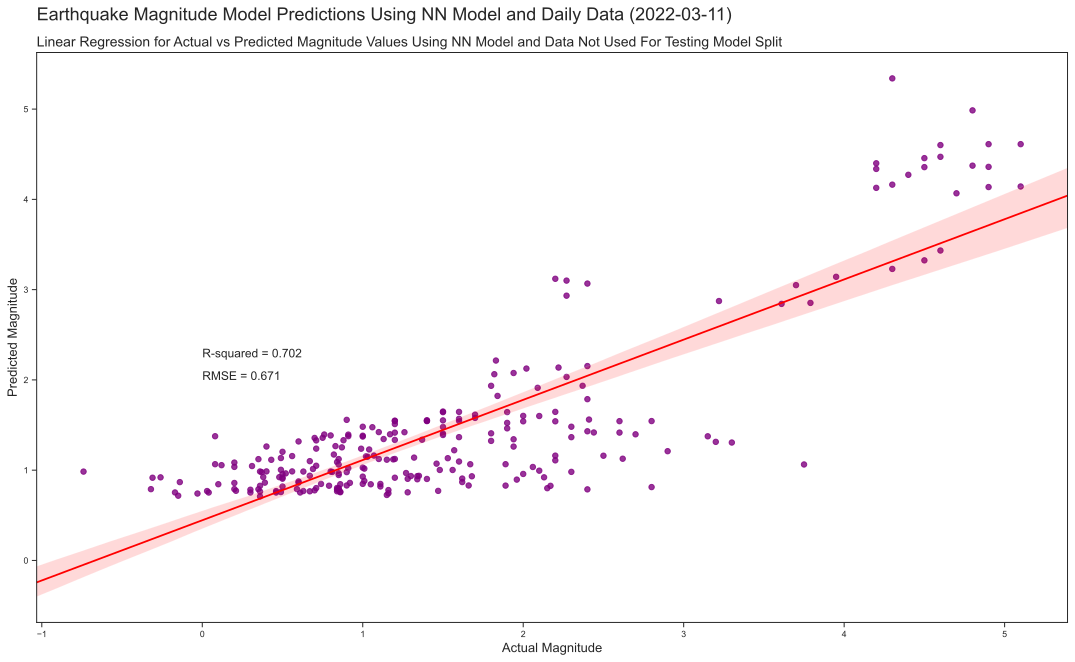

In [126]:
from datetime import date
today = date.today()

x = np.array(dftest_pred['Actual'])
y = np.array(dftest_pred["Predicted"])
test_mse = mean_squared_error(actual_mag2,predictions_t2)
rmse = sqrt(test_mse)

sns.set_style('ticks')
x,y = pd.Series(x, name="Actual"), pd.Series(y, name="Prediction")
# sns.lmplot(x ='Actual', y ='Prediction', data = mag_pred_all, markers =['o'],  palette ='coolwarm')
ax = sns.regplot(x=x, y=y, ci=95, truncate=False, scatter_kws={"s": 30, "color":'purple'}, line_kws={"color": "red"})
ax.set_axisbelow(True)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.ylabel('Predicted Magnitude', fontsize=13)
plt.xlabel('Actual Magnitude',  fontsize=13)
# Bigger title
plt.suptitle(f'Earthquake Magnitude Model Predictions Using NN Model and Daily Data ({today})', x=0.125, y=0.94, ha='left', fontsize=18)
# Subtitle
plt.title('Linear Regression for Actual vs Predicted Magnitude Values Using NN Model and Data Not Used For Testing Model Split', loc='left', fontsize=14)
plt.annotate("R-squared = {:.3f}".format(r2_score(x, y)), (0, 2.25),  fontsize=12)
plt.annotate("RMSE = {:.3f}".format(rmse), (0, 2), fontsize=12)

# fig.savefig('extratrees_mag_linear_sns.png', dpi=600)
plt.show()